<a href="https://colab.research.google.com/github/yeswhos/COMP5400M-Bio-inspired-Computing/blob/master/CW2/Backpropagation%20on%20the%20Iris%20data%20set.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<a rel="license" href="http://creativecommons.org/licenses/by/4.0/"><img alt="Creative Commons Licence" style="border-width:0" src="https://i.creativecommons.org/l/by/4.0/88x31.png" /></a><br /><span xmlns:dct="http://purl.org/dc/terms/" property="dct:title">COMP5400 - Tensorflow Demo</span> by <span xmlns:cc="http://creativecommons.org/ns#" property="cc:attributionName">Marc de Kamps, University of Leeds</span> is licensed under a <a rel="license" href="http://creativecommons.org/licenses/by/4.0/">Creative Commons Attribution 4.0 International License</a>.

This notebook demonstrates the use of keras. We will first use it to create a multi-layer perceptron that can classify the iris data set.

In [0]:
# first check if all the prerequisites are there.
import tensorflow as tf
from tensorflow.keras import layers


If the previous cells came through, then all the important stuff has been installed on your machine. Now let's process the iris data set and create a 1-of-3 coding.

Load data file from google drive

In [2]:
from google.colab import drive
drive.mount('/content/drive')
filepath = "drive/My Drive/Bio/iris.data"

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [3]:
inputs  = []
outputs = []
iris = []

d = {}
d['Iris-setosa\n']     = [1., 0., 0.]
d['Iris-versicolor\n'] = [0., 1., 0.]
d['Iris-virginica\n']  = [0., 0., 1.]

# with open('iris.data') as f:
with open(filepath) as f:
    lines=f.readlines()
    for line in lines:
        items=line.split(',')
        iris.append(items)
        if len(items) == 5:
            inp =  [float(x) for x in items[0:4] ]
            inputs.append(inp)
            out = d[items[4]]
            outputs.append(out)
            
print( len(inputs), 'input patterns', len(outputs), 'output patterns')

150 input patterns 150 output patterns


In [0]:
print(iris)

[['5.1', '3.5', '1.4', '0.2', 'Iris-setosa\n'], ['4.9', '3.0', '1.4', '0.2', 'Iris-setosa\n'], ['4.7', '3.2', '1.3', '0.2', 'Iris-setosa\n'], ['4.6', '3.1', '1.5', '0.2', 'Iris-setosa\n'], ['5.0', '3.6', '1.4', '0.2', 'Iris-setosa\n'], ['5.4', '3.9', '1.7', '0.4', 'Iris-setosa\n'], ['4.6', '3.4', '1.4', '0.3', 'Iris-setosa\n'], ['5.0', '3.4', '1.5', '0.2', 'Iris-setosa\n'], ['4.4', '2.9', '1.4', '0.2', 'Iris-setosa\n'], ['4.9', '3.1', '1.5', '0.1', 'Iris-setosa\n'], ['5.4', '3.7', '1.5', '0.2', 'Iris-setosa\n'], ['4.8', '3.4', '1.6', '0.2', 'Iris-setosa\n'], ['4.8', '3.0', '1.4', '0.1', 'Iris-setosa\n'], ['4.3', '3.0', '1.1', '0.1', 'Iris-setosa\n'], ['5.8', '4.0', '1.2', '0.2', 'Iris-setosa\n'], ['5.7', '4.4', '1.5', '0.4', 'Iris-setosa\n'], ['5.4', '3.9', '1.3', '0.4', 'Iris-setosa\n'], ['5.1', '3.5', '1.4', '0.3', 'Iris-setosa\n'], ['5.7', '3.8', '1.7', '0.3', 'Iris-setosa\n'], ['5.1', '3.8', '1.5', '0.3', 'Iris-setosa\n'], ['5.4', '3.4', '1.7', '0.2', 'Iris-setosa\n'], ['5.1', '3.7

In [0]:
import numpy as np
total = np.array(inputs)
# print(total)
set_sepal_len = total[:50:,0]
set_sepal_wid = total[:50:,1]
set_petal_len = total[:50:,2]
set_petal_wid = total[:50:,3]

versi_sepal_len = total[50:100:,0]
versi_sepal_wid = total[50:100:,1]
versi_petal_len = total[50:100:,2]
versi_petal_wid = total[50:100:,3]

virgin_sepal_len = total[100:150:,0]
virgin_sepal_wid = total[100:150:,1]
virgin_petal_len = total[100:150:,2]
virgin_petal_wid = total[100:150:,3]



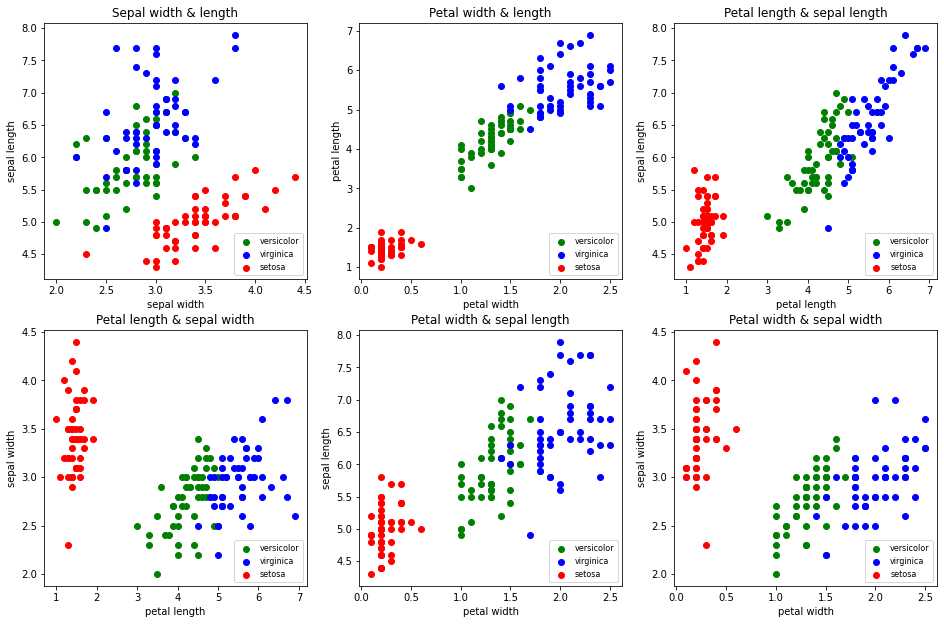

In [0]:
from pylab import *
import matplotlib.pyplot as plt

plt.figure(figsize=(16, 16))
plt.subplot(3, 3, 1)
plt.title("Sepal width & length")
plt.xlabel("sepal width")
plt.ylabel("sepal length")
p1 = plt.scatter(versi_sepal_wid, versi_sepal_len, c = 'g', marker = "o")
p2 = plt.scatter(virgin_sepal_wid, virgin_sepal_len, c = 'b', marker = "o")
p3 = plt.scatter(set_sepal_wid, set_sepal_len, c = 'r', marker = "o")
plt.tick_params(axis='both', which = 'major', labelsize=10)
plt.legend([p1, p2, p3], ['versicolor', 'virginica', 'setosa'], loc = 'lower right', prop = {'size':8})

plt.subplot(3, 3, 2)
plt.title("Petal width & length")
plt.xlabel("petal width")
plt.ylabel("petal length")
p4 = plt.scatter(versi_petal_wid, versi_petal_len, c = 'g', marker = "o")
p5 = plt.scatter(virgin_petal_wid, virgin_petal_len, c = 'b', marker = "o")
p6 = plt.scatter(set_petal_wid, set_petal_len, c = 'r', marker = "o")
plt.tick_params(axis='both', which = 'major', labelsize=10)
plt.legend([p1, p2, p3], ['versicolor', 'virginica', 'setosa'], loc = 'lower right', prop = {'size':8})
#plt.legend([p4, p5, p6], ['versicolor', 'virginica', 'setosa'], loc = 'lower right')

plt.subplot(3, 3, 3)
plt.title("Petal length & sepal length")
plt.xlabel("petal length")
plt.ylabel("sepal length")
p7 = plt.scatter(versi_petal_len, versi_sepal_len, c = 'g', marker = "o")
p8 = plt.scatter(virgin_petal_len, virgin_sepal_len, c = 'b', marker = "o")
p9 = plt.scatter(set_petal_len, set_sepal_len, c = 'r', marker = "o")
plt.tick_params(axis='both', which = 'major', labelsize=10)
plt.legend([p1, p2, p3], ['versicolor', 'virginica', 'setosa'], loc = 'lower right', prop = {'size':8})

plt.subplot(3, 3, 4)
plt.title("Petal length & sepal width")
plt.xlabel("petal length")
plt.ylabel("sepal width")
p7 = plt.scatter(versi_petal_len, versi_sepal_wid, c = 'g', marker = "o")
p8 = plt.scatter(virgin_petal_len, virgin_sepal_wid, c = 'b', marker = "o")
p9 = plt.scatter(set_petal_len, set_sepal_wid, c = 'r', marker = "o")
plt.tick_params(axis='both', which = 'major', labelsize=10)
plt.legend([p1, p2, p3], ['versicolor', 'virginica', 'setosa'], loc = 'lower right', prop = {'size':8})

plt.subplot(3, 3, 5)
plt.title("Petal width & sepal length")
plt.xlabel("petal width")
plt.ylabel("sepal length")
p7 = plt.scatter(versi_petal_wid, versi_sepal_len, c = 'g', marker = "o")
p8 = plt.scatter(virgin_petal_wid, virgin_sepal_len, c = 'b', marker = "o")
p9 = plt.scatter(set_petal_wid, set_sepal_len, c = 'r', marker = "o")
plt.tick_params(axis='both', which = 'major', labelsize=10)
plt.legend([p1, p2, p3], ['versicolor', 'virginica', 'setosa'], loc = 'lower right', prop = {'size':8})

plt.subplot(3, 3, 6)
plt.title("Petal width & sepal width")
plt.xlabel("petal width")
plt.ylabel("sepal width")
p7 = plt.scatter(versi_petal_wid, versi_sepal_wid, c = 'g', marker = "o")
p8 = plt.scatter(virgin_petal_wid, virgin_sepal_wid, c = 'b', marker = "o")
p9 = plt.scatter(set_petal_wid, set_sepal_wid, c = 'r', marker = "o")
plt.tick_params(axis='both', which = 'major', labelsize=10)
plt.legend([p1, p2, p3], ['versicolor', 'virginica', 'setosa'], loc = 'lower right', prop = {'size':8})
plt.show()

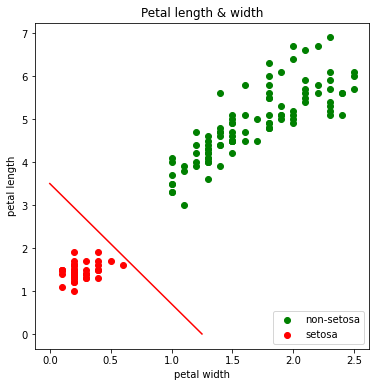

In [0]:
plt.figure(figsize=(6, 6))
plt.title("Petal length & width")
plt.xlabel("petal width")
plt.ylabel("petal length")
p1 = plt.scatter(versi_petal_wid, versi_petal_len, c = 'g', marker = "o")
p2 = plt.scatter(virgin_petal_wid, virgin_petal_len, c = 'g', marker = "o")
p3 = plt.scatter(set_petal_wid, set_petal_len, c = 'r', marker = "o")
plt.tick_params(axis='both', which = 'major', labelsize=10)
plt.legend([p2, p3], ['non-setosa', 'setosa'], loc = 'lower right')
x = [0, 3.5]
y = [1.25, 0]
plt.plot(y, x, 'r')
plt.show()

In [11]:
import pandas as pd
from sklearn.datasets import load_iris

iris = load_iris()

df = pd.DataFrame(iris.data, columns=iris.feature_names)
df['label'] = iris.target
df.head()


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),label
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [0]:
data = np.array(df.iloc[:100, [2, 3, -1]])
X_setoa, y_setoa = data[:,:-1], data[:,-1]

In [0]:
data_1 = np.array(df.iloc[50:150, [2, 3, -1]])
X_virginica, y_virginica = data_1[:,:-1], data_1[:,-1]

In [0]:
data_total = np.array(df.iloc[:, [2, 3, -1]])

In [0]:
print(len(y_virginica))

100


In [0]:
#from goto import with_goto
import tensorflow.compat.v1 as tf
tf.compat.v1.disable_eager_execution()
# import tensorflow as tf
class Perceptron(object):
    def __init__(self, input_feature_num, activation=None, b = 0.0):
        self.activation = activation if activation else self.sign
        self.w = [0.0] * input_feature_num
        self.b = b

    def sign(self, z):
        return int(z>0)
    def predict(self, x):
        return self.activation(
            np.dot(self.w, x) + self.b)
    
    def fit(self, x_train, y_train, iteration=10, learning_rate=0.1):
        # 训练函数
        for _ in range(iteration):
            counter = 0
            for x, y in zip(x_train, y_train):
                y_hat = self.predict(x)
                # print(y)
                # print(y_hat)
                loss = tf.Variable((y - y_hat) ** 2, name = 'loss')
                init = tf.global_variables_initializer()
                with tf.Session() as session:
                  session.run(init)
                  a = session.run(loss)
                  #print("loss", session.run(loss))
                if(a == 0.0):
                  counter += 1  
                self._update_weights(x, y, y_hat, learning_rate)
            if(counter > 90):
                # print(count)
                # print(counter)
                print(self.__str__())
                return
        print(self)
    # def _loss_function(n_x, n_y):
    #     loss = tf.Variable((n_x - n_y) ** 2, name = 'loss')
    #     init = tf.global_variables_initializer()
    #     with tf.Session() as session:
    #       session.run(init)
    #       # print(session.run(loss))
    #       return session.run(loss)

    
    def _update_weights(self, x, y, y_hat, learning_rate):
        delta = y - y_hat
        self.w = np.add(self.w,np.multiply(learning_rate * delta, x))
        self.b += learning_rate * delta
    
    def __str__(self):
        return 'weights: {}\tbias: {}'.format(self.w, self.b)

In [24]:
perceptron_setoa = Perceptron(input_feature_num=X_setoa.shape[1])
perceptron_setoa.fit(X_setoa, y_setoa, iteration=100, learning_rate=0.1)

weights: [0.47 0.14]	bias: 0.1


In [0]:
perceptron_virginica = Perceptron(input_feature_num=X_virginica.shape[1], b = -200000.0)
perceptron_virginica.fit(X_virginica, y_virginica, iteration=1000, learning_rate=0.1)

weights: [52478.2        18440.13999999]	bias: -189729.29999940217


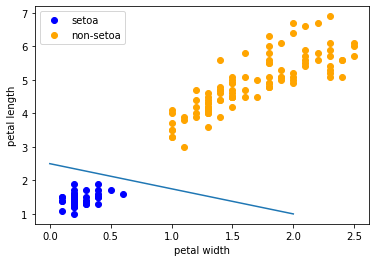

In [0]:
x_points = np.linspace(0, 2)
y_ = -(perceptron_setoa.w[0]*x_points + perceptron_setoa.b)/perceptron_setoa.w[1]
z_ = -(perceptron_setoa.w[0]*x_points + perceptron_setoa.b)/perceptron_setoa.w[1]
plt.plot(x_points, y_)

# plt.plot(data[:50, 0], data[:50, 1], 'bo', color='blue', label='0')
# plt.plot(data[50:100, 0], data[50:100, 1], 'bo', color='orange', label='1')
plt.plot(data_total[:50, 1], data_total[:50, 0],'bo', color='blue', label='setoa')
plt.plot(data_total[50:150, 1],data_total[50:150, 0], 'bo', color='orange', label='non-setoa')
plt.xlabel('petal width')
plt.ylabel('petal length')
plt.legend()

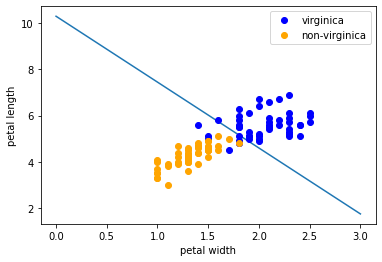

In [0]:
x_points = np.linspace(0,3)
# y_points = np.linspace(0,3)
y_ = -(perceptron_virginica.w[0]*x_points + perceptron_virginica.b)/perceptron_virginica.w[1]
# z_ = -(perceptron_setoa.w[0]*y_points + perceptron_setoa.b)/perceptron_setoa.w[1]
plt.plot(x_points, y_)
# plt.plot(y_points, z_)
# plt.plot(data[:50, 0], data[:50, 1], 'bo', color='blue', label='0')
# plt.plot(data[50:100, 0], data[50:100, 1], 'bo', color='orange', label='1')
plt.plot(data_total[100:150, 1], data_total[100:150, 0],'bo', color='blue', label='virginica')
plt.plot(data_total[50:100, 1], data_total[50:100, 0],'bo', color='orange', label='non-virginica')
# plt.plot(data_total[50:100, 1],data_total[50:100, 0], 'bo', color='orange', label='versicolor')
# plt.plot(data_total[:50, 1],data_total[:50, 0], 'bo', color='green', label='setosa')
plt.xlabel('petal width')
plt.ylabel('petal length')
plt.legend()

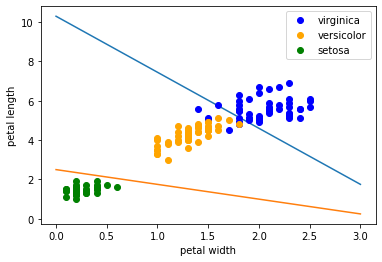

In [0]:
x_points = np.linspace(0,3)
y_points = np.linspace(0,3)
y_ = -(perceptron_virginica.w[0]*x_points + perceptron_virginica.b)/perceptron_virginica.w[1]
z_ = -(perceptron_setoa.w[0]*y_points + perceptron_setoa.b)/perceptron_setoa.w[1]
plt.plot(x_points, y_)
plt.plot(y_points, z_)
# plt.plot(data[:50, 0], data[:50, 1], 'bo', color='blue', label='0')
# plt.plot(data[50:100, 0], data[50:100, 1], 'bo', color='orange', label='1')
plt.plot(data_total[100:150, 1], data_total[100:150, 0],'bo', color='blue', label='virginica')
# plt.plot(data_total[50:100, 1], data_total[50:100, 0],'bo', color='orange', label='non-virginica')
plt.plot(data_total[50:100, 1],data_total[50:100, 0], 'bo', color='orange', label='versicolor')
plt.plot(data_total[:50, 1],data_total[:50, 0], 'bo', color='green', label='setosa')
plt.xlabel('petal width')
plt.ylabel('petal length')
plt.legend()

In [0]:
w = tf.Variable([[0.0, 0.0], [0.0, 0.0], [0.06, 52478.2], [0.08, 18440.13999999]])
b = tf.Variable(-0.2, -189729.29999940217)
print(b)


<tf.Variable 'Variable_109:0' shape=() dtype=float32>


In [0]:
tf.Variable(tf.random_normal([4, 2]))

<tf.Variable 'Variable_68:0' shape=(4, 2) dtype=float32>

In [0]:
import tensorflow.compat.v1 as tf
tf.compat.v1.disable_eager_execution() 

In [0]:

train_X, train_Y = train_inputs, train_outputs

#print(train_Y)

n_input = 4
n_hidden = 2
# n_hidden_2 = 5
n_output = 3

X = tf.placeholder("float",[None,n_input])
Y = tf.placeholder("float",[None,n_output])

weights = {
  "hidden": w,
  # "hidden_2": tf.Variable(tf.random_normal([2,n_hidden_2])),
	"output": tf.Variable(tf.random_normal([n_hidden,n_output])),
}

bias = {

  "hidden": b,
  # "hidden_2": tf.Variable(tf.random_normal([n_hidden_2])),
	"output": tf.Variable(tf.random_normal([n_output])),
}

def model(X, weights, bias):
  layer1 = tf.add(tf.matmul(X, weights["hidden"]),bias["hidden"])
  # layer2 = tf.add(tf.matmul(X, weights["hidden_2"]),bias["hidden_2"])
  layer1 = tf.nn.relu(layer1)
  output_layer = tf.matmul(layer1,weights["output"]) + bias["output"]
  return output_layer

test_X, test_Y = val_inputs, val_outputs
pred = model(X,weights,bias)

cost = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(logits=pred, labels=Y))
optimizador = tf.train.AdamOptimizer(0.01).minimize(cost)

init = tf.global_variables_initializer()

with tf.Session() as sess:
	sess.run(init)
  
	for epochs in range(1000):
		_, c= sess.run([optimizador,cost],feed_dict = {X: train_X, Y: train_Y})
		if(epochs + 1) % 100 == 0:
			print("Epoch:",epochs+1,"Cost:", c)
	print("Optimization Finished")

	test_result = sess.run(pred,feed_dict = {X: train_X})
	correct_prediction = tf.equal(tf.argmax(test_result,1),tf.argmax(train_Y,1))
	accuracy = tf.reduce_mean(tf.cast(correct_prediction,"float"))

	print("accuracy:", accuracy.eval({X: test_X, Y: test_Y}))

Epoch: 100 Cost: 773.0076
Epoch: 200 Cost: 488.24527
Epoch: 300 Cost: 287.04858
Epoch: 400 Cost: 261.02972
Epoch: 500 Cost: 183.53166
Epoch: 600 Cost: 5.9706416
Epoch: 700 Cost: 36.360783
Epoch: 800 Cost: 245.6848
Epoch: 900 Cost: 485.29282
Epoch: 1000 Cost: 77.52723
Optimization Finished
accuracy: 0.64


In [0]:
with tf.Session() as sess:
  sess.run(tf.global_variables_initializer())
  print(sess.run(weights))

{'hidden': array([[0.000000e+00, 0.000000e+00],
       [0.000000e+00, 0.000000e+00],
       [6.000000e-02, 5.247820e+04],
       [8.000000e-02, 1.844014e+04]], dtype=float32), 'output': array([[ 1.3765048 ,  1.0485619 ,  0.3632738 ],
       [ 0.704572  , -1.1088995 , -0.10013436]], dtype=float32)}


In [0]:
train_outputs

Now we build a network. A stack of layers is captured by the tf.keras.Sequential model.

In [0]:
import numpy as np
import random
ids=random.sample(range(0,len(inputs)), 100) # generate 100 random ids
train_in = []
train_out=[]
for id in ids:
    train_in.append(inputs[id])
    train_out.append(outputs[id])
train_inputs  = np.array(train_in)
train_outputs = np.array(train_out)

val_input =[]
val_output=[]
validation_ids = list(set(range(0,len(inputs))) - set(ids))
for val_id in validation_ids:
    val_input.append(inputs[val_id])
    val_output.append(outputs[val_id])
val_inputs  = np.array(val_input)
val_outputs = np.array(val_output)


In [0]:
print(train_inputs)

In [0]:

tf.disable_v2_behavior()
model = tf.keras.Sequential()
# an mlp with a given number of input nodes. Four input nodes, three output nodes 
nr_hidden = 5
nr_in     = 4
nr_out    = 3 
model.add(layers.Dense(nr_in,activation='relu'))
model.add(layers.Dense(nr_hidden, activation = 'sigmoid'))
model.add(layers.Dense(nr_out,activation='sigmoid'))
model.compile(optimizer=tf.train.GradientDescentOptimizer(0.05),loss='mse',metrics=['accuracy'])

Create training set and bring them into a numpy array form. Let's use a 100 patterns for training. Also, build a validation set.

Now train:

In [0]:
# earlystop=tf.keras.callbacks.EarlyStopping(monitor='val_acc',min_delta=-0.01,patience=800,verbose=True,restore_best_weights=True)
# callbacks=[earlystop]
# history_model = model.fit(train_inputs,train_outputs,epochs=20000,batch_size=30,validation_data=(val_inputs,val_outputs),callbacks=callbacks)
model.fit(train_inputs,train_outputs,epochs=1500,batch_size=30, validation_data=(val_inputs, val_outputs))

Train on 100 samples, validate on 50 samples
Epoch 1/1500
100/100 [==============================] - 0s 3ms/sample - loss: 0.3158 - acc: 0.3700 - val_loss: 0.3050 - val_acc: 0.2600
Epoch 2/1500
100/100 [==============================] - 0s 115us/sample - loss: 0.3125 - acc: 0.3700 - val_loss: 0.3019 - val_acc: 0.2600
Epoch 3/1500
100/100 [==============================] - 0s 99us/sample - loss: 0.3092 - acc: 0.3700 - val_loss: 0.2990 - val_acc: 0.2600
Epoch 4/1500
100/100 [==============================] - 0s 113us/sample - loss: 0.3060 - acc: 0.3700 - val_loss: 0.2963 - val_acc: 0.2600
Epoch 5/1500
100/100 [==============================] - 0s 93us/sample - loss: 0.3029 - acc: 0.3700 - val_loss: 0.2934 - val_acc: 0.2600
Epoch 6/1500
100/100 [==============================] - 0s 91us/sample - loss: 0.2998 - acc: 0.3700 - val_loss: 0.2907 - val_acc: 0.2600
Epoch 7/1500
100/100 [==============================] - 0s 95us/sample - loss: 0.2969 - acc: 0.3700 - val_loss: 0.2881 - val_acc: 0.

In [0]:
vla_accu=[]
vla_accu=history_model.history['val_acc']
vla_loss=[]
val_loss=history_model.history['val_loss']

Epochs=[]
i=0
for i in range(0,len(vla_accu)):
  Epochs.append(i)
  i += 1
# Sepal length with Petal length
plt.plot(Epochs,vla_accu,c='b',label="vlidation acc")
plt.xlabel('epoch')
plt.ylabel('valid accuracy')
# plt.legend()
plt.show()

'drive/My Drive/Bio/model-1.ckpt'

In [0]:
model.summary()
print(model)

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_6 (Dense)              multiple                  20        
_________________________________________________________________
dense_7 (Dense)              multiple                  25        
_________________________________________________________________
dense_8 (Dense)              multiple                  18        
Total params: 63
Trainable params: 63
Non-trainable params: 0
_________________________________________________________________


In [0]:
model.predict(val_inputs[10:15])

array([[0.9245236 , 0.08677843, 0.05508441],
       [0.06156909, 0.30243862, 0.74234533],
       [0.9086228 , 0.10777846, 0.04662282],
       [0.06236158, 0.38606724, 0.64347243],
       [0.90817803, 0.10871404, 0.04611995]], dtype=float32)

In [0]:
print(train_out[5:10])

[[0.0, 1.0, 0.0], [0.0, 1.0, 0.0], [1.0, 0.0, 0.0], [0.0, 1.0, 0.0], [1.0, 0.0, 0.0]]


In [0]:
print(val_outputs[10:15])

[[1. 0. 0.]
 [0. 0. 1.]
 [1. 0. 0.]
 [0. 0. 1.]
 [1. 0. 0.]]
